In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [3]:
# Data Preprocessing
# Map categorical values to numerical values

#cp - chest_pain_type
df.loc[df['ChestPain'] == 'asymptomatic', 'ChestPain'] = '0'
df.loc[df['ChestPain'] == 'nontypical', 'ChestPain'] = '1'
df.loc[df['ChestPain'] == 'nonanginal', 'ChestPain'] = '2'
df.loc[df['ChestPain'] == 'typical', 'ChestPain'] = '3'
#thal - thalassemia_type
df.loc[df['Thal'] == 'NaN', 'Thal'] = '0'
df.loc[df['Thal'] == 'fixed', 'Thal'] = '1'
df.loc[df['Thal'] == 'normal', 'Thal'] = '2'
df.loc[df['Thal'] == 'reversable', 'Thal'] = '3'
# target
df.loc[df['target'] == 'No', 'target'] = 0
df.loc[df['target'] == 'Yes', 'target'] = 1
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,1,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,2,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,3,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,2,0
4,41,0,1,130,204,0,2,172,0,1.4,1,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,3,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,3,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,3,1
301,57,0,1,130,236,0,2,174,0,0.0,2,1.0,2,1


In [4]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
target       0
dtype: int64

In [5]:
# Handle missing values
df.fillna(0,inplace = True)
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
target       0
dtype: int64

In [6]:
for i in df.columns:
    print(i,len(df[i].unique()))

Age 41
Sex 2
ChestPain 4
RestBP 50
Chol 152
Fbs 2
RestECG 3
MaxHR 91
ExAng 2
Oldpeak 40
Slope 3
Ca 4
Thal 4
target 2


In [7]:
# Visualizations and Data Exploration
# Create a copy of the dataframe

df2 = df.copy()

# Map numerical values back to their categorical names
def chng(Sex):
    if Sex == 0:
        return 'female'
    else:
        return 'male'
df2['Sex'] = df2['Sex'].apply(chng)
def chng2(prob):
    if prob == 1:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

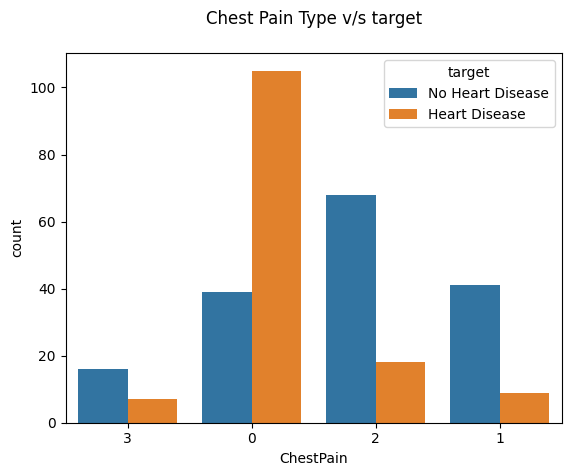

In [8]:
sns.countplot(data= df2, x='ChestPain',hue='target')
plt.title('Chest Pain Type v/s target\n') 

c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

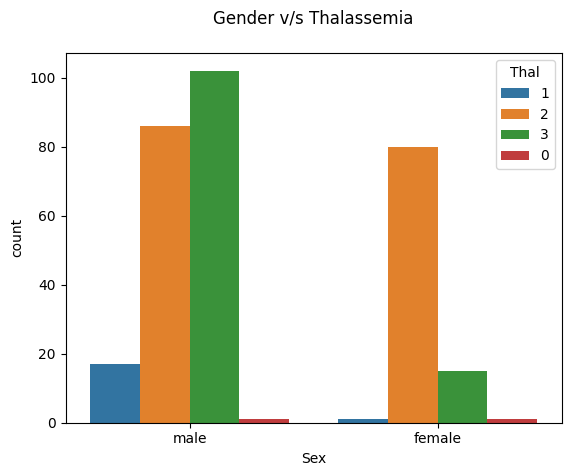

In [9]:
sns.countplot(data= df2, x='Sex',hue='Thal')
plt.title('Gender v/s Thalassemia\n')

c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.5, 1.0, 'Slope v/s Target\n')

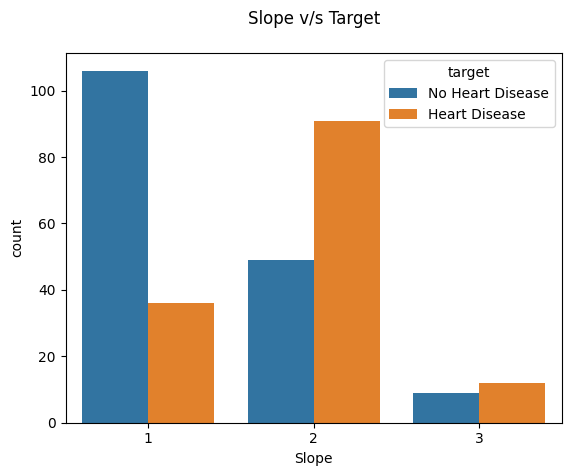

In [10]:
sns.countplot(data= df2, x='Slope',hue='target')
plt.title('Slope v/s Target\n')

c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.5, 1.0, 'ExAng v/s Thalassemia')

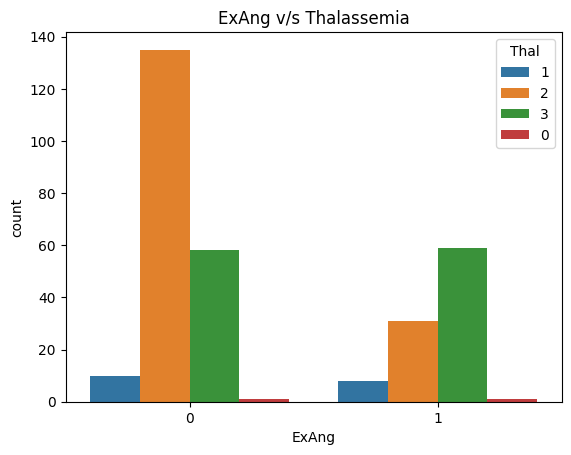

In [11]:
sns.countplot(data = df2, x = 'ExAng',hue ='Thal')
plt.title('ExAng v/s Thalassemia')

c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

<Figure size 1600x700 with 0 Axes>

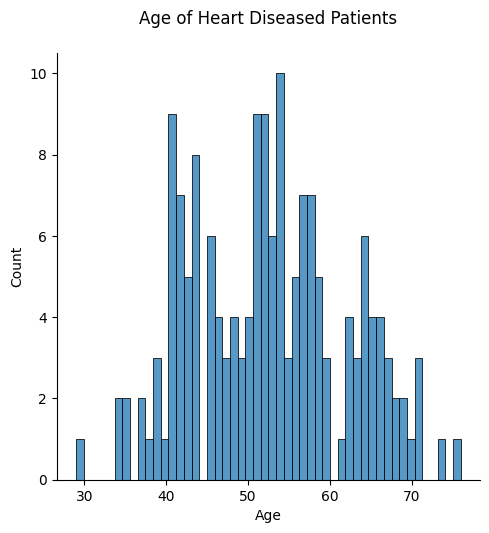

In [13]:
plt.figure(figsize=(16,7))
sns.displot(df[df['target']==0]['Age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

In [14]:
# One-Hot Encoding

data = pd.get_dummies(df, drop_first=False)
data.columns
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,target,ChestPain_0,ChestPain_1,ChestPain_2,ChestPain_3,Thal_0,Thal_1,Thal_2,Thal_3
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,False,False,False,True,False,True,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,True,False,False,False,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,True,False,False,False,False,False,False,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,False,False,True,False,False,False,True,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,False,True,False,False,False,False,True,False


In [15]:
data = pd.get_dummies(df, drop_first=True)
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,target,ChestPain_1,ChestPain_2,ChestPain_3,Thal_1,Thal_2,Thal_3
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,False,False,True,True,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,False,False,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,False,False,False,False,False,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,False,True,False,False,True,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,True,False,False,False,True,False


In [16]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis = 1)
y = data['target']

In [17]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [18]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(tol=1e-9,max_iter=2500)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=2500, tol=1e-09)

In [19]:
# Make predictions

y_pred = lg.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
    actual.append(i)
    predcition.append(j)
dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)
fig = go.Figure() 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',marker = dict(size = 8, symbol = 'cross'),
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',marker = dict(size=5),
                    name='Pred'))

# Create a Plotly figure to visualize actual vs. predicted values

In [ ]:
# Print accuracy and classification report

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8852459016393442
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.86      0.83      0.84        23

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.88        61
weighted avg       0.88      0.89      0.88        61

